In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt



In [2]:

# Function to load the dataset from a CSV file
def load_dataset(Medical):
    data = []
    with open('Medical.csv') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            data.append(row)
    return data

In [3]:

# Function to preprocess the dataset
def preprocess_dataset(data):
    # Separate features and target variable
    X = []
    y = []
    for row in data:
        features = [float(row[0]), 1.0]  # Use age as the feature and add a constant term for the intercept
        target = float(row[-1])  # Charges as the target variable
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)


In [4]:

# Function to calculate the coefficients using the normal equation
def calculate_coefficients(X, y):
    XtX = np.dot(X.T, X)
    Xty = np.dot(X.T, y)
    coefficients = np.linalg.inv(XtX).dot(Xty)
    return coefficients


In [5]:

# Function to make predictions using the calculated coefficients
def predict(X, coefficients):
    return np.dot(X, coefficients)



In [6]:

# Function to visualize the results
def plot_results(X, y, predictions):
    plt.scatter(X[:, 0], y, color='blue', label='Actual')
    plt.plot(X[:, 0], predictions, color='red', linewidth=2, label='Predicted')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend()
    plt.show()


In [7]:

# Main function
def main():
    # Load the dataset
    filename = 'Medical.csv'
    data = load_dataset('Medical.csv')

    # Preprocess the dataset
    X, y = preprocess_dataset(data)

    # Calculate the coefficients
    coefficients = calculate_coefficients(X, y)

    # Make predictions
    predictions = predict(X, coefficients)

    # Print the predicted values
    print("Predicted Values:", predictions)

    # Visualize the results
    plot_results(X, y, predictions)


Predicted Values: [ 8062.61476073  7804.89214207 10382.11832874 ...  7804.89214207
  8578.05999807 18886.96474474]


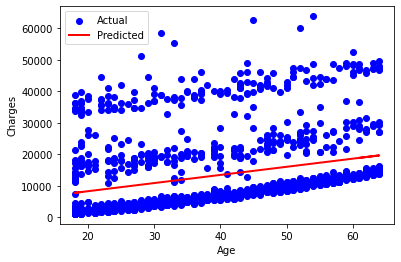

In [8]:

# Run the main function
if __name__ == '__main__':
    main()
